In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [19]:
data =pd.read_csv('C:\\Users\\Dilan\\Desktop\\lotto\\cleaned_data.csv')
data

,Draw/Date,Results
0,1751.0,N
1,NaN,11
2,NaN,16
3,NaN,20
4,NaN,53
...,...,...
2354,1539.0,Z
2355,NaN,13
2356,NaN,53
2357,NaN,65


In [20]:
data.head(10)

,Draw/Date,Results
0,1751.0,N
1,NaN,11
2,NaN,16
3,NaN,20
4,NaN,53
5,1750.0,X
6,NaN,27
7,NaN,43
8,NaN,48
9,NaN,65


In [21]:
# Remove rows where both columns are NaN
data1 = data.dropna(how='all', subset=['Draw/Date', 'Results'])

print(data1)

      Draw/Date Results
0        1751.0       N
1           NaN      11
2           NaN      16
3           NaN      20
4           NaN      53
...         ...     ...
2354     1539.0       Z
2355        NaN      13
2356        NaN      53
2357        NaN      65
2358        NaN      72

[1065 rows x 2 columns]


In [22]:
data1.head(20)

,Draw/Date,Results
0,1751.0,N
1,NaN,11
2,NaN,16
3,NaN,20
4,NaN,53
5,1750.0,X
6,NaN,27
7,NaN,43
8,NaN,48
9,NaN,65


In [23]:
# Forward fill the "Draw/Date" column
data1["Draw/Date"] = data1["Draw/Date"].fillna(method="ffill")

C:\Users\Dilan\AppData\Local\Temp\ipykernel_7588\1621844889.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1["Draw/Date"] = data1["Draw/Date"].fillna(method="ffill")
C:\Users\Dilan\AppData\Local\Temp\ipykernel_7588\1621844889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Draw/Date"] = data1["Draw/Date"].fillna(method="ffill")


In [24]:
# Group by "Draw/Date" and aggregate results into separate columns
result_data = data1.groupby("Draw/Date")["Results"].apply(lambda x: pd.Series(x.values)).unstack().reset_index()
result_data

,Draw/Date,0,1,2,3,4
0,1539.0,Z,13,53,65,72
1,1540.0,U,4,10,50,71
2,1541.0,P,8,14,25,54
3,1542.0,L,4,10,28,73
4,1543.0,Z,5,29,39,60
...,...,...,...,...,...,...
208,1747.0,J,1,3,30,44
209,1748.0,M,9,18,52,75
210,1749.0,O,17,26,47,56
211,1750.0,X,27,43,48,65


In [25]:
# Rename columns
result_data.columns = ["Draw/Date", "Result1", "Result2", "Result3", "Result4", "Result5"]
print(result_data)

     Draw/Date Result1 Result2 Result3 Result4 Result5
0       1539.0       Z      13      53      65      72
1       1540.0       U       4      10      50      71
2       1541.0       P       8      14      25      54
3       1542.0       L       4      10      28      73
4       1543.0       Z       5      29      39      60
..         ...     ...     ...     ...     ...     ...
208     1747.0       J       1       3      30      44
209     1748.0       M       9      18      52      75
210     1749.0       O      17      26      47      56
211     1750.0       X      27      43      48      65
212     1751.0       N      11      16      20      53

[213 rows x 6 columns]


In [26]:
result_data.head(10)


,Draw/Date,Result1,Result2,Result3,Result4,Result5
0,1539.0,Z,13,53,65,72
1,1540.0,U,4,10,50,71
2,1541.0,P,8,14,25,54
3,1542.0,L,4,10,28,73
4,1543.0,Z,5,29,39,60
5,1544.0,T,25,57,59,74
6,1545.0,L,12,22,36,52
7,1546.0,C,16,20,31,72
8,1547.0,F,15,43,67,68
9,1548.0,P,8,21,28,46


In [27]:
len(result_data)

213

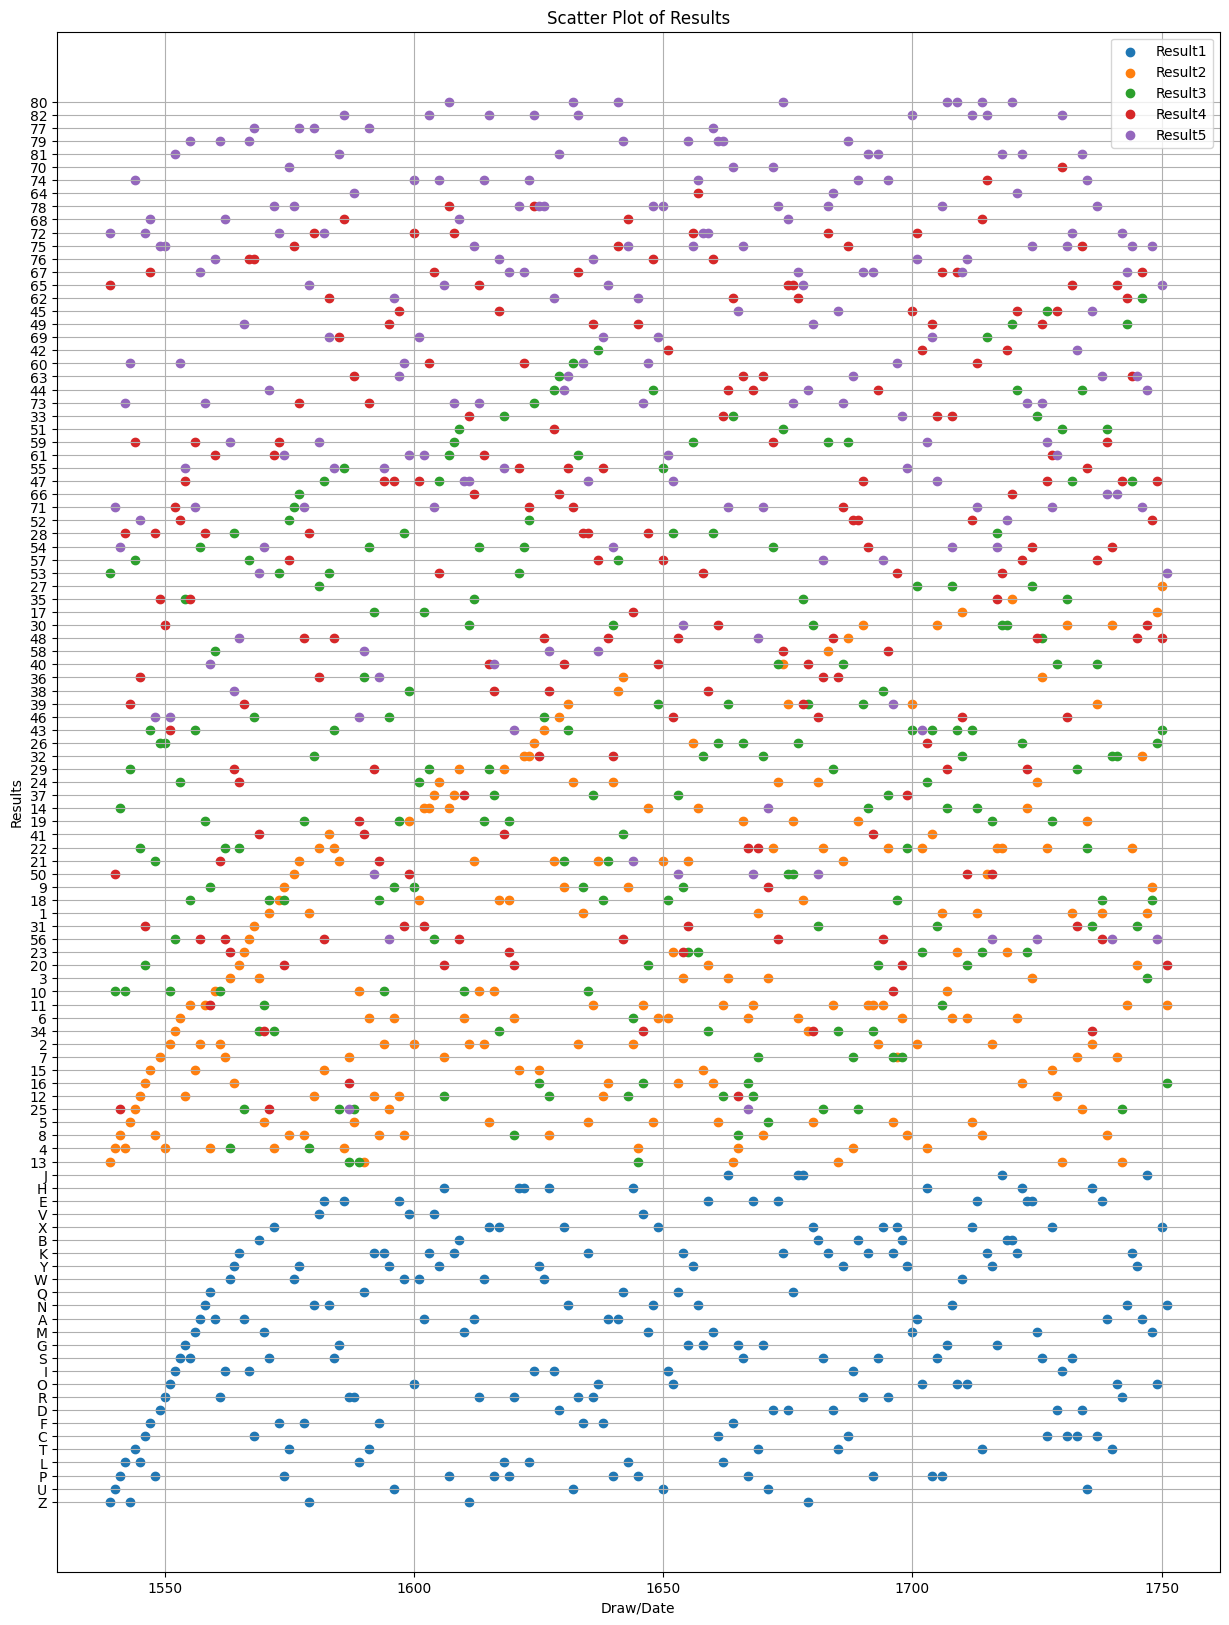

In [36]:
#data visualization
plt.figure(figsize=(15,20))

for i, col in enumerate(['Result1','Result2','Result3','Result4','Result5'],start=1): 
    plt.scatter(result_data['Draw/Date'],result_data[col],label=col)

plt.title("Scatter Plot of Results")
plt.xlabel("Draw/Date")
plt.ylabel("Results")
plt.legend()
plt.grid(True)

plt.show()
